In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os, sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# import geopandas as gpd
sys.path.append('../src/')
sys.path.append('../content/')
import data_utils as du
import loadpaths
path_dict_pecl = loadpaths.loadpaths()
# import shapely
# from tqdm import tqdm, tqdm_notebook
# import ast, shutil

## Download EO data from Google Earth Engine via API

*API key required:* assuming a file `content/api_keys.py` that just contains the line `GEE_API = '<key>'`

In [5]:
import ee, geemap
import api_keys

ee.Authenticate()
ee.Initialize(project=api_keys.GEE_API)
geemap.ee_initialize()

In [21]:
# tmp = du.get_gee_image_from_point(coords_keep[0], image_collection='dsm',
                                #   threshold_size=1)
tmp = du.download_gee_image(coords_keep[0], name='tmp-dsm', image_collection='dsm', resize_image=True)
# tmp.getInfo()

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/data/2025-10 neureo/sample/tmp-dsm_dsm_y-2024.tif


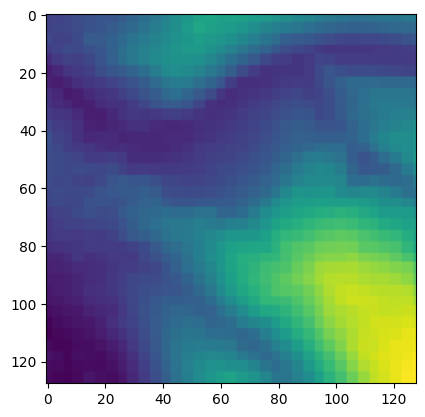

In [17]:
plt.imshow(np.squeeze(tmp[0].values))

In [ ]:
# tmp_coords_list = [(-5.829883, 54.248818),
#                 (-4.247973, 51.627768),
#                 (-4.05749, 52.521469),
#                 (-1.226506, 50.891421),
#                 (-2.361399, 52.385976),
#                 (-1.554099, 50.830184),
#                 (-0.208709, 51.842453),
#                 (1.005961, 51.331986),
#                 (-0.828484, 50.888106),
#                 (-1.420833, 52.403092)]

coords_keep = pd.read_csv('../content/coords_pecl_filtered_30km.csv')
coords_keep = [tuple(x) for x in coords_keep.values]
coords_keep

# tmp = du.download_gee_image(tmp_coords_list[0], name='tmp-dynamicworld', image_collection='dynamicworld', resize_image=True)

du.download_list_coord(
                    #    coord_list=tmp_coords_list, 
                    #    name_group='pecl-fig', path_save='../content/sample_data',
                       coord_list=coords_keep,
                        # coord_list=[coords_keep[i] for i in list_inds_redo],
                       name_group='pecl176', path_save='/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km',
                       start_index=0, stop_index=None)

# for ii, tmp_coords in enumerate(tmp_coords_list):
#     im, path_im = du.download_gee_image(coords=tmp_coords, name=f'pecl-fig-{ii}',  verbose=0,
#                                         path_save='../content/sample_data',
#                                                 image_collection='dynamicworld')

In [46]:
du.download_gee_image(coords=tmp_coords, name='sample-0', image_collection='alphaearth')

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif


(<xarray.DataArray (band: 64, y: 128, x: 128)>
 [1048576 values with dtype=float64]
 Coordinates:
   * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
   * x            (x) float64 5.759e+05 5.76e+05 5.76e+05 ... 5.772e+05 5.772e+05
   * y            (y) float64 6.012e+06 6.012e+06 ... 6.014e+06 6.014e+06
     spatial_ref  int64 0
 Attributes:
     AREA_OR_POINT:           Area
     TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
     TIFFTAG_XRESOLUTION:     1
     TIFFTAG_YRESOLUTION:     1
     _FillValue:              -inf
     scale_factor:            1.0
     add_offset:              0.0,
 '/Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif')

# Plot data

Sentinel-2: (4, 128, 128) <class 'xarray.core.dataarray.DataArray'>
AlphaEarth: (64, 128, 128) <class 'xarray.core.dataarray.DataArray'>
Dynamic World: (9, 128, 128) <class 'xarray.core.dataarray.DataArray'>
WorldClimBio: <class 'dict'> dict_keys(['bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'coords', 'name'])
DSM: (1, 128, 128) <class 'xarray.core.dataarray.DataArray'>


Text(0.5, 1.0, 'Dynamic World (water)')

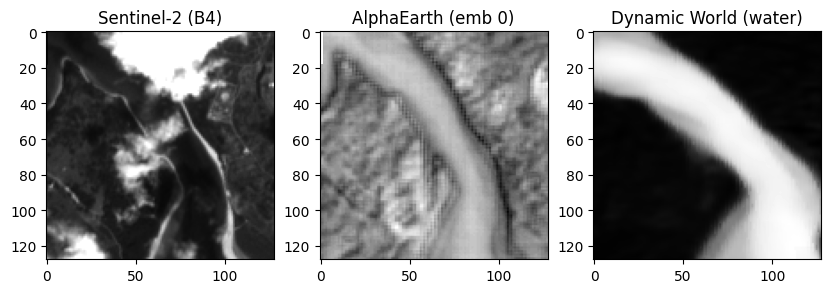

In [39]:
(data_sent, data_alpha, data_dyn, data_worldclim, data_dsm) = du.load_all_modalities_from_name(name='pecl-fig-0', path_folder='../content/sample_data', verbose=1)

fig, ax = plt.subplots(1,3, figsize=(10,3))

ax[0].imshow(np.clip(data_sent[0, ...], 0, 3000) / 3000, cmap='gray')
ax[0].set_title('Sentinel-2 (B4)')
ax[1].imshow(data_alpha[0, ...], cmap='gray')
ax[1].set_title('AlphaEarth (emb 0)')
ax[2].imshow(data_dyn[0, ...], cmap='gray')
ax[2].set_title('Dynamic World (water)')

LC pixel count: Counter({1: 8610, 0: 6882, 7: 417, 6: 382, 2: 87, 8: 5, 5: 1})


/opt/anaconda3/envs/pecl/lib/python3.10/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


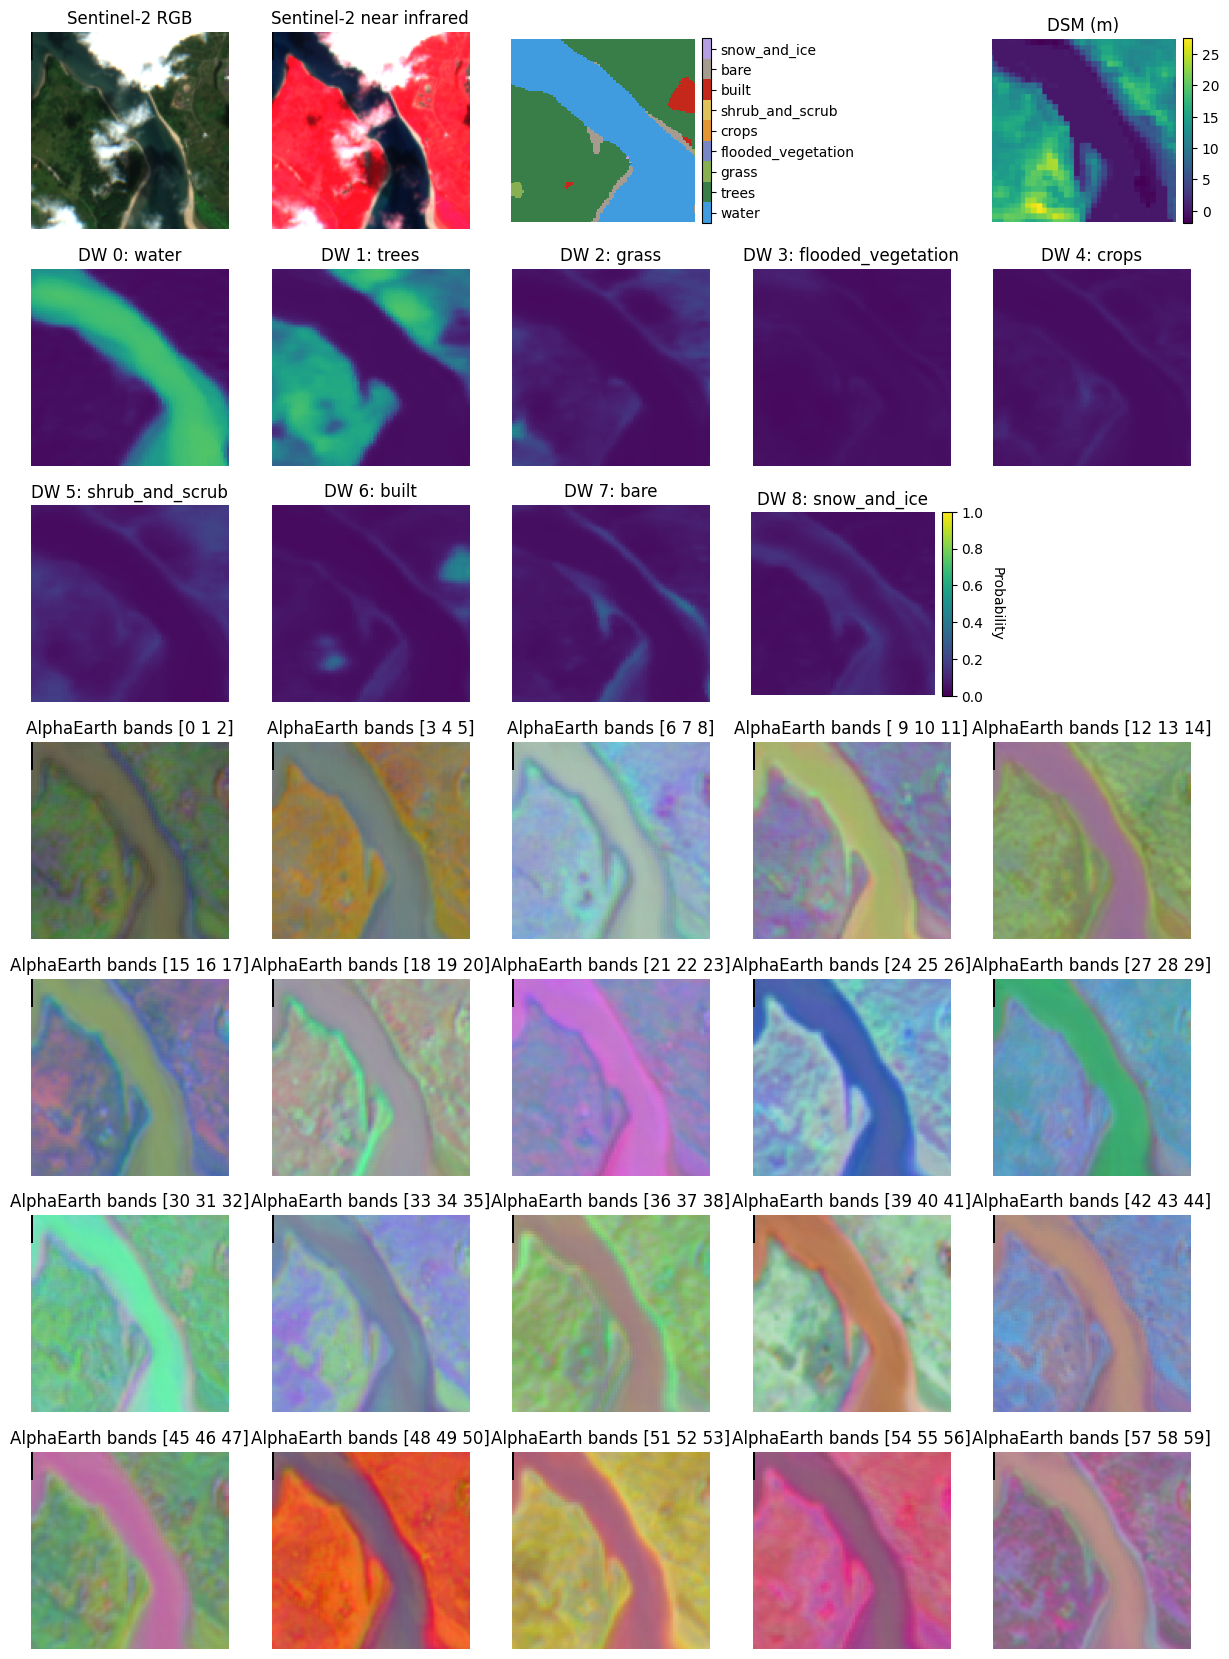

In [41]:
du.plot_overview_images('../content/sample_data', name='pecl-fig-0', plot_alphaearth=True, plot_dynamicworld_full=True)

LC pixel count: Counter({1: 12671, 2: 2522, 0: 1051, 4: 95, 6: 43, 5: 2})


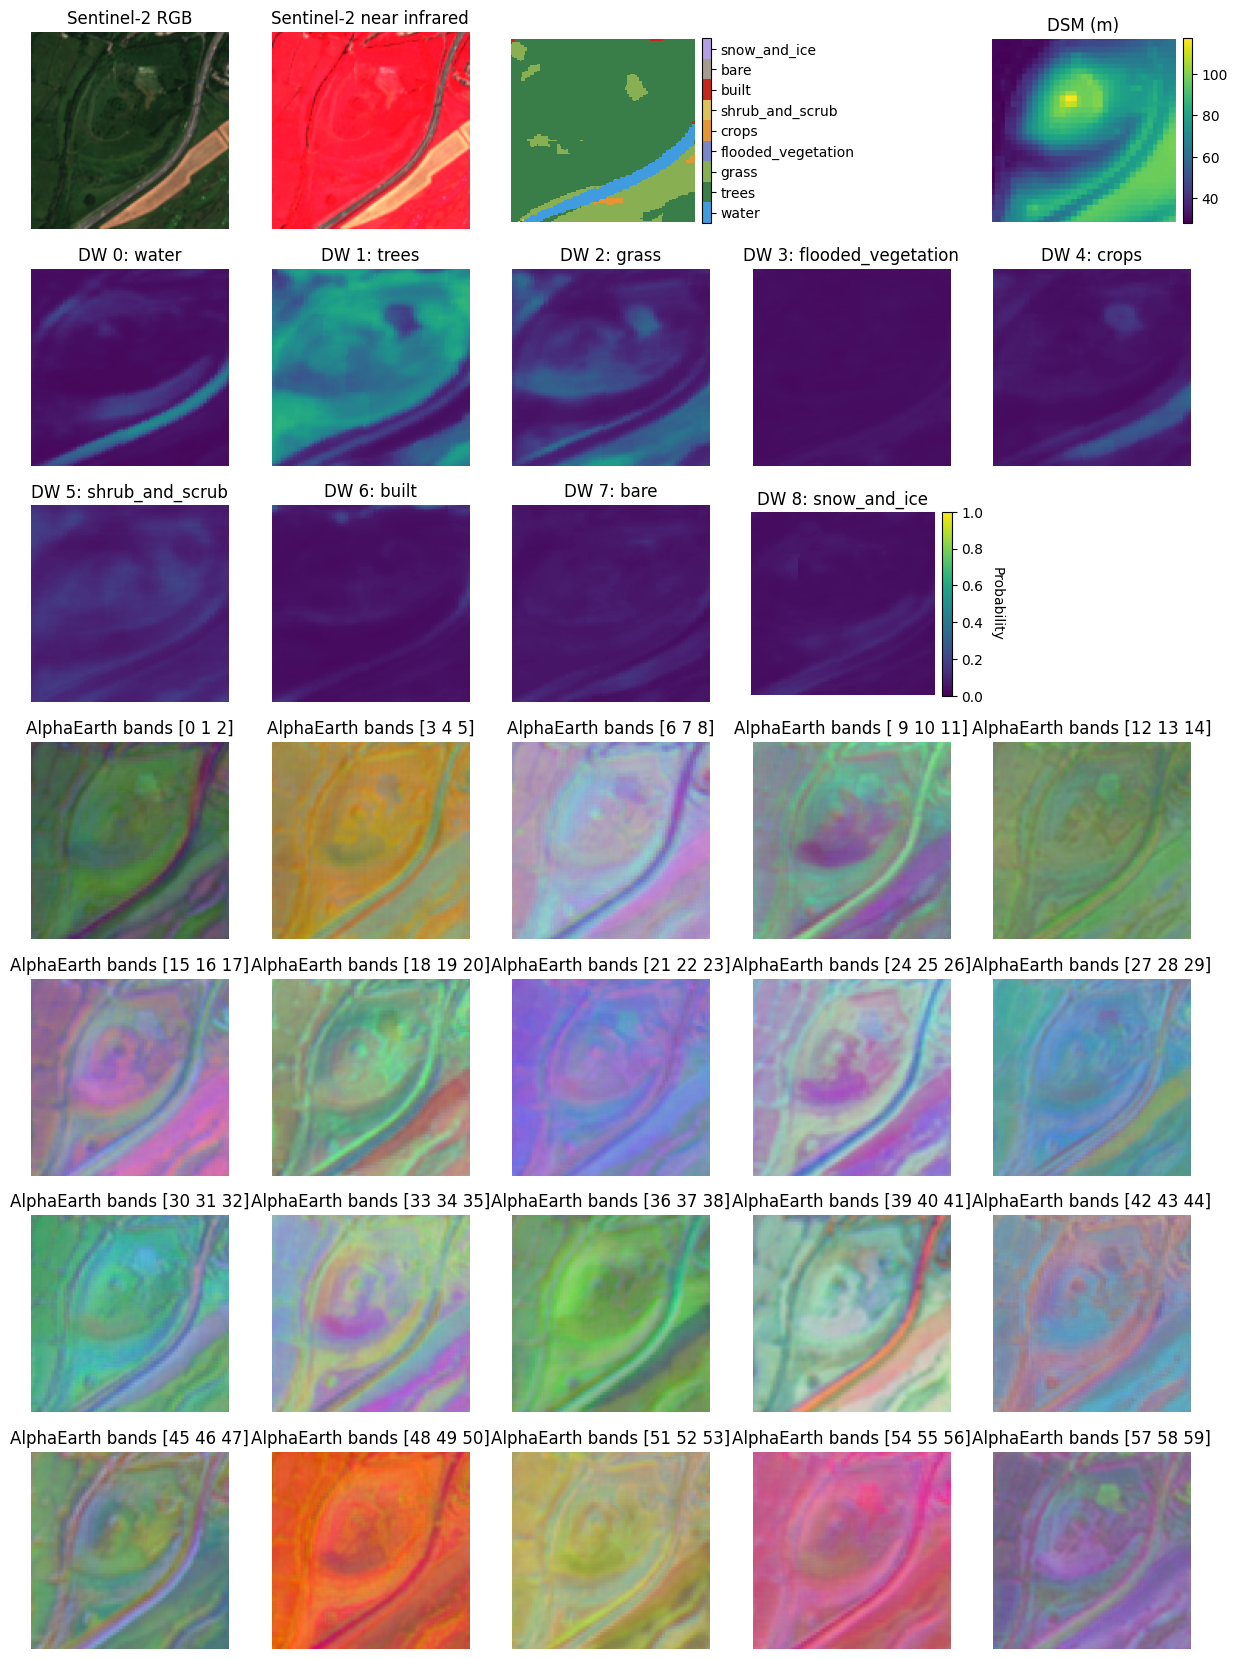

In [35]:
path_folder = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-45km/'
assert os.path.exists(path_folder)
# os.listdir(path_folder)[0:5]
du.plot_overview_images(path_folder, name='pecl100-4', plot_alphaearth=True, plot_dynamicworld_full=True)

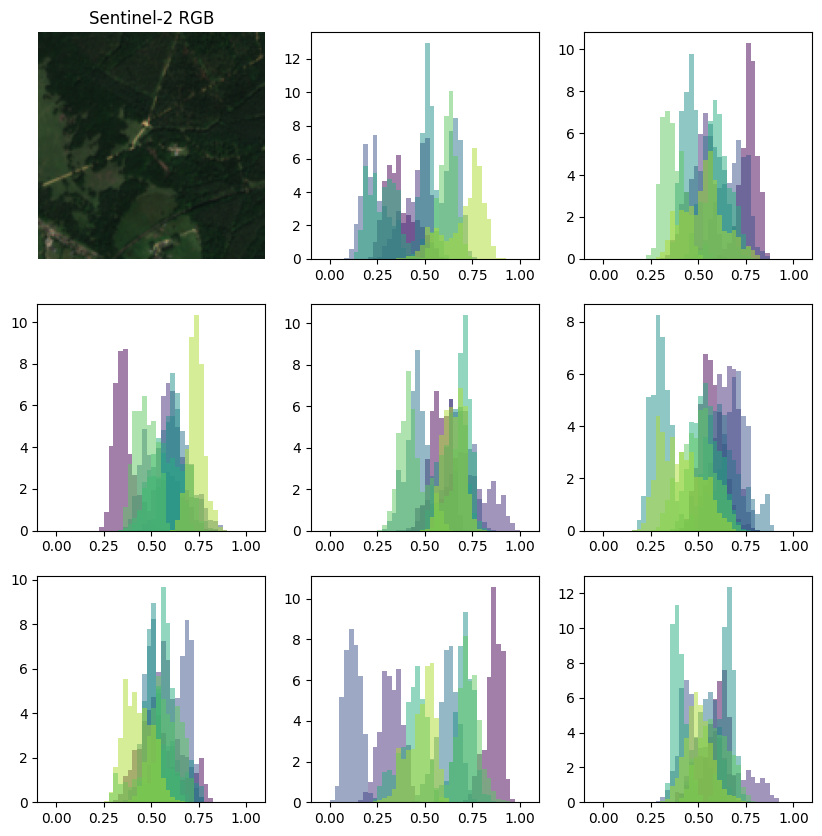

In [13]:
du.plot_distr_embeddings('../content/sample_data', name='pecl-fig-5')

In [91]:
# ## Correlation of each alpha earth band with each sentinel-2 band
# correlation_matrix = np.zeros((im_plot_alpha.shape[0], im_plot_s2.shape[0]))
# for i in range(im_plot_alpha.shape[0]):
#     for j in range(im_plot_s2.shape[0]):
#         band_alpha = im_loaded_alpha[i, ...].values.flatten()
#         band_s2 = im_plot_s2[j, ...].values.flatten()
#         correlation_matrix[i, j] = np.corrcoef(band_alpha, band_s2)[0, 1]

# import seaborn as sns
# sns.scatterplot(correlation_matrix) 

In [93]:
# corr_mat_alpha = np.zeros((im_plot_alpha.shape[0], im_plot_alpha.shape[0]))
# for i in range(im_plot_alpha.shape[0]): 
#     for j in range(im_plot_alpha.shape[0]):
#         band_alpha_i = im_loaded_alpha[i, ...].values.flatten()
#         band_alpha_j = im_loaded_alpha[j, ...].values.flatten()
#         corr_mat_alpha[i, j] = np.corrcoef(band_alpha_i, band_alpha_j)[0, 1]
# # sns.heatmap(corr_mat_alpha, )
# plt.imshow(corr_mat_alpha, cmap='coolwarm', vmin=-1, vmax=1)

# Sample locations:

In [ ]:
import pandas as pd
import ast
# import geopy.distance
from tqdm import tqdm
import geopandas as gpd
path_s2bms_presence = "/Users/tplas/data/2025-04-11 S2BMS/ukbms_species-presence/bms_presence_y-2018-2019_th-200.csv"
df_s2bms = pd.read_csv(path_s2bms_presence)
coords_s2bms = list(df_s2bms['tuple_coords'].apply(lambda x: ast.literal_eval(x)))
shuffled_inds = np.random.permutation(len(coords_s2bms))

In [30]:
min_threshold_km = 30
coords_keep = [] 
for ind in tqdm(shuffled_inds):
    coord = coords_s2bms[ind]
    add_coord = True
    if len(coords_keep) == 0:
        coords_keep.append(coord)
        continue
    
    for c in coords_keep:
        dist = geopy.distance.distance(coord, c).km
        if dist < min_threshold_km:
            add_coord = False
            break
    if add_coord:
        coords_keep.append(coord)
    # if len(coords_keep) >= 100:
    #     break

len(coords_keep)

100%|██████████| 1455/1455 [00:03<00:00, 430.56it/s]


176

In [12]:
coords_keep = pd.read_csv('../content/coords_pecl_filtered_30km.csv')
coords_keep = [tuple([float(y) for y in x]) for x in coords_keep.values]
coords_keep

[(-1.109573, 51.798774),
 (-2.39995, 53.392663),
 (-1.297994, 50.864895),
 (-0.334642, 51.970188),
 (-2.155165, 52.233593),
 (1.693422, 52.724552),
 (-0.446685, 51.252356),
 (-1.80728, 54.759287),
 (0.861309, 51.083771),
 (-0.98347, 50.952507),
 (-0.630607, 51.812155),
 (-1.338576, 52.986997),
 (-1.660247, 55.612628),
 (-1.464683, 51.198492),
 (0.576829, 51.360206),
 (-2.838185, 54.262246),
 (-0.953508, 52.894335),
 (-0.331154, 53.228847),
 (-2.871642, 51.430258),
 (-0.792606, 51.175504),
 (-1.373998, 54.640998),
 (-3.732046, 50.593336),
 (0.154361, 51.845355),
 (0.791003, 52.974051),
 (-1.420715, 52.412081),
 (-1.78107, 50.875792),
 (-1.520103, 52.736163),
 (-2.648617, 52.933128),
 (-2.079144, 50.642162),
 (-3.723731, 51.519739),
 (-1.100783, 51.51098),
 (1.091353, 51.320768),
 (-2.983638, 56.471723),
 (-1.276666, 54.011338),
 (-2.650749, 55.988748),
 (-4.158371, 51.566501),
 (-4.230955, 50.38697),
 (-3.139935, 51.805607),
 (-0.214884, 52.418007),
 (-2.547711, 50.80277),
 (-1.965318, 

In [21]:
from collections import Counter
counter_off = {}
counter_all = Counter(int(x.split('_')[0].split('-')[1]) for x in os.listdir('/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km/'))
for k, v in counter_all.items():
    if v != 5:
        counter_off[k] = v
print(len(counter_off), len(counter_all))
# counter_off 
inds_complete = sorted([k for k, v in counter_all.items() if v == 5])
inds_sel_complete = np.random.choice(inds_complete, size=100, replace=False)

23 176


(np.float64(-8.2), np.float64(2.0), np.float64(49.0), np.float64(61.0))

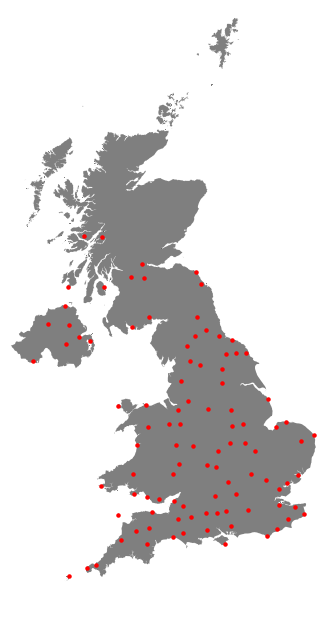

In [27]:
## plot the selected coordinates on a map
## https://www.diva-gis.org/gdata
import geopandas as gpd
path_map = '/Users/tplas/data/2025-10-12 GBR_adm/GBR_adm0.shp'
assert os.path.exists(path_map)
import shapely
fig_map, ax_map = plt.subplots(1,1, figsize=(5,8))
gdf_uk = gpd.read_file(path_map)
# gdf_uk = gpd.GeoDataFrame(gdf_uk, geometry=gdf_uk.geometry, crs=gdf_uk.crs)
# gdf_uk = gdf_uk.set_geometry('geometry')
gdf_uk['geometry'] = gpd.GeoSeries(gdf_uk['geometry'])
if gdf_uk.crs is None:
    print("CRS is None!")
    gdf_uk = gdf_uk.set_crs('epsg:27700', allow_override=True)
gdf_uk.plot(ax=ax_map, color='k', alpha=0.5)
# print(gdf_uk.crs)
# gdf_uk.crs = 'epsg:27700'
# print(gdf_uk.crs)


point_locs = [coords_keep[x] for x in inds_sel_complete]
# return point_locs|
point_locs = [shapely.geometry.Point(loc) for loc in point_locs]
gdf_bms = gpd.GeoDataFrame(geometry=point_locs)
gdf_bms.crs = gdf_uk.crs
gdf_bms.plot(ax=ax_map, markersize=5, color='red', aspect='auto')
# gdf_bms = gdf_bms.iloc[[126, 167, 370, 457]]
# gdf_bms.plot(ax=ax_map, markersize=5, color=color_dict_stand[0], aspect='auto')
ax_map.set_xlim(-8.2, 2)
ax_map.set_ylim(49, 61)
ax_map.axis('off')

In [26]:
## write inds_sel_complete to file
with open('../content/inds_pecl_filtered_30km_100.txt', 'w') as f:
    for item in sorted(inds_sel_complete):
        f.write("%s\n" % item)

In [35]:
## copy files for selected inds:
folder_original = '/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km/'
folder_destination = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km/'

assert os.path.exists(folder_original) and os.path.exists(folder_destination)
from tqdm import tqdm
import shutil
for ind in tqdm(inds_sel_complete):
    files = [x for x in os.listdir(folder_original) if x.startswith(f'pecl176-{ind}_')]
    assert len(files) == 5, f'For ind {ind}, found {len(files)} files instead of 5.'
    for f in files:
        shutil.copy(os.path.join(folder_original, f), os.path.join(folder_destination, f))

100%|██████████| 100/100 [00:00<00:00, 138.96it/s]


In [24]:
df_coords_keep = pd.DataFrame([coords_keep[x] for x in inds_sel_complete], columns=['lon', 'lat'])
df_coords_keep.to_csv('../content/coords_pecl_filtered_30km_100.csv', index=False)
df_coords_keep

,lon,lat
0,-0.983470,50.952507
1,-1.296463,53.741815
2,-2.568475,51.342204
3,-1.781070,50.875792
4,-0.972789,54.575350
...,...,...
95,-2.179747,54.651467
96,-3.672617,50.908974
97,-2.722294,51.080586
98,-3.682808,55.017391


In [36]:
from collections import Counter
counter_off = {}
counter_all = Counter([x.split('_')[1] for x in os.listdir('/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km/')])
for k, v in counter_all.items():
    if v != 100:
        counter_off[k] = v
print(len(counter_off), len(counter_all))
counter_all

0 5


Counter({'alphaearth': 100,
         'worldclimbio': 100,
         'dynamicworld': 100,
         'dsm': 100,
         'sent2-4band': 100})